In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 9)

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
data = datasets.load_iris()

In [4]:
feature_count = 3
target_names = data.target_names
feature_names = data.feature_names[:feature_count]
x = data.data[:, :feature_count]
y = data.target

required_index = np.where(y==2)[0][0]
X = x[:required_index]
Y = y[:required_index]
Y[Y == 0] = -1

In [5]:
print target_names
print feature_names

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


In [6]:
class Perceptron(object):
    def __init__(self):
        self.weights = None
        self.bias = 0
        
    def fit(self, x_train, y_train, maxiter=10):
        self.bias = 0
        self.weights = np.zeros(len(x_train[0]))
        for iteration in range(maxiter):
            x_train, y_train = shuffle(x_train, y_train)
            for sample_index in range(len(x_train)):
                activation = np.dot(x_train[sample_index], self.weights) + self.bias
                if activation * y_train[sample_index] <= 0:
                    self.weights += x_train[sample_index] * y_train[sample_index]
                    self.bias += y_train[sample_index]
                    
    def predict(self, x_test):
        predictions = np.empty(shape=(1,0))
        for feature_sample in x_test:
            activation = np.dot(feature_sample, self.weights) + self.bias
            predictions = np.append(predictions, np.sign(activation))
        return predictions

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_predicted = perceptron.predict(x_test)
print "Accuracy : %0.2f%%"%(accuracy_score(y_test, y_predicted)*100)

Accuracy : 100.00%


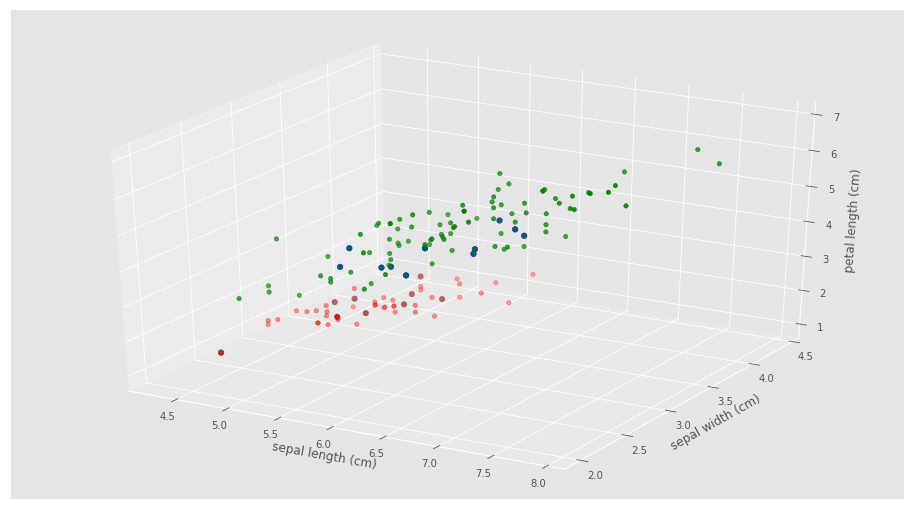

In [15]:
ax = plt.axes(projection='3d')

#Training data
colors = ['red' if category == -1 else 'green' for category in y]
ax.scatter3D(x[:,0], x[:, 1], x[:,2], c=colors);

#Test data
colors = ['black' if category == -1 else 'blue' for category in y_test]
size = [2**8 if y_test[index] != y_predicted[index] else 2**5 for index in range(len(y_test))]

ax.scatter(x_test[:,0], x_test[:, 1], x_test[:,2], c=colors, s=size);
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])